In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [165]:
games = pd.read_csv("gamesTraining.csv")
games

,wteam,lteam,rpiRank,pts,fgPcg,stl,blk
0,1228,1414,-248,101,49,-1.0,3.0
1,1268,1370,-210,398,71,-2.0,2.5
2,1338,1348,-90,328,53,-2.0,-0.5
3,1400,1298,-291,662,59,-3.0,2.5
4,1228,1405,-293,640,64,0.0,3.0
...,...,...,...,...,...,...,...
21377,1196,1246,-15,-176,10,2.0,-3.0
21378,1277,1276,3,127,-1,2.0,2.5
21379,1386,1433,11,-197,50,-6.5,0.0
21380,1418,1209,9,68,-11,-1.0,-0.5


Nakon sto smo ucitali sve utakmice po kojima cemo trenirati nas model oznacavamo utakmice sa 1 u kojima je dobio favorit po nasoj statistici a sa 0 kada je dobio autsajder po toj statistici i taj novi stupac cemo koristit da bi dobili postotak dobiveni od strane favorita po toj statistici. Takodjer pretvaramo vrijednosti statistika u apsolutne vrijednosti

In [166]:
games['games'] = 1
games.loc[games['rpiRank'] >= 0, 'favouriteWonRpi'] = 1
games.loc[games['rpiRank'] < 0, 'favouriteWonRpi'] = 0
games.loc[games['pts'] >= 0, 'favouriteWonPts'] = 1
games.loc[games['pts'] < 0, 'favouriteWonPts'] = 0
games.loc[games['fgPcg'] >= 0, 'favouriteWonFgPcg'] = 1
games.loc[games['fgPcg'] < 0, 'favouriteWonFgPcg'] = 0
games.loc[games['stl'] >= 0, 'favouriteWonStl'] = 1
games.loc[games['stl'] < 0, 'favouriteWonStl'] = 0
games.loc[games['blk'] >= 0, 'favouriteWonBlk'] = 1
games.loc[games['blk'] < 0, 'favouriteWonBlk'] = 0
games['rpiRank'] = games['rpiRank'].abs()
games['pts'] = games['pts'].abs()
games['fgPcg'] = games['fgPcg'].abs()
games['stl'] = games['stl'].abs()
games['blk'] = games['blk'].abs()
games

,wteam,lteam,rpiRank,pts,fgPcg,stl,blk,games,favouriteWonRpi,favouriteWonPts,favouriteWonFgPcg,favouriteWonStl,favouriteWonBlk
0,1228,1414,248,101,49,1.0,3.0,1,0.0,1.0,1.0,0.0,1.0
1,1268,1370,210,398,71,2.0,2.5,1,0.0,1.0,1.0,0.0,1.0
2,1338,1348,90,328,53,2.0,0.5,1,0.0,1.0,1.0,0.0,0.0
3,1400,1298,291,662,59,3.0,2.5,1,0.0,1.0,1.0,0.0,1.0
4,1228,1405,293,640,64,0.0,3.0,1,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21377,1196,1246,15,176,10,2.0,3.0,1,0.0,0.0,1.0,1.0,0.0
21378,1277,1276,3,127,1,2.0,2.5,1,1.0,1.0,0.0,1.0,1.0
21379,1386,1433,11,197,50,6.5,0.0,1,1.0,0.0,1.0,0.0,1.0
21380,1418,1209,9,68,11,1.0,0.5,1,1.0,1.0,0.0,0.0,0.0


Sada grupiramo po svakoj vrijednosti od nasih novih statistika i racunamo postotak pobjedenih

In [167]:
rpiSummed = games.groupby(['rpiRank'], as_index=False)['favouriteWonRpi', 'games'].sum()
rpiSummed['favWinRpi'] = rpiSummed['favouriteWonRpi'] / rpiSummed['games']
rpiSummed

C:\Users\Zvonimir Ravlic\AppData\Local\Temp\ipykernel_13976\1927349922.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  rpiSummed = games.groupby(['rpiRank'], as_index=False)['favouriteWonRpi', 'games'].sum()


,rpiRank,favouriteWonRpi,games,favWinRpi
0,1,106.0,180,0.588889
1,2,82.0,177,0.463277
2,3,86.0,188,0.457447
3,4,86.0,183,0.469945
4,5,72.0,161,0.447205
...,...,...,...,...
327,329,0.0,2,0.000000
328,330,0.0,2,0.000000
329,333,0.0,2,0.000000
330,335,0.0,1,0.000000


In [168]:
stlSummed = games.groupby(['stl'], as_index=False)['favouriteWonStl', 'games'].sum()
stlSummed['favWinStl'] = stlSummed['favouriteWonStl'] / stlSummed['games']
stlSummed = stlSummed[stlSummed.stl != 0]
stlSummed

C:\Users\Zvonimir Ravlic\AppData\Local\Temp\ipykernel_13976\610818982.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stlSummed = games.groupby(['stl'], as_index=False)['favouriteWonStl', 'games'].sum()


,stl,favouriteWonStl,games,favWinStl
1,0.5,2679.0,5206,0.514599
2,1.0,2256.0,4158,0.542569
3,1.5,1884.0,3367,0.559549
4,2.0,1358.0,2348,0.578365
5,2.5,935.0,1608,0.581468
6,3.0,570.0,940,0.606383
7,3.5,300.0,527,0.569260
8,4.0,176.0,275,0.640000
9,4.5,82.0,123,0.666667
10,5.0,58.0,87,0.666667


In [169]:
ptsSummed = games.groupby(['pts'], as_index=False)['favouriteWonPts', 'games'].sum()
ptsSummed['favWinPts'] = ptsSummed['favouriteWonPts'] / ptsSummed['games']
ptsSummed = ptsSummed[ptsSummed.pts != 0]
ptsSummed

C:\Users\Zvonimir Ravlic\AppData\Local\Temp\ipykernel_13976\3326404444.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ptsSummed = games.groupby(['pts'], as_index=False)['favouriteWonPts', 'games'].sum()


,pts,favouriteWonPts,games,favWinPts
1,1,19.0,43,0.441860
2,2,25.0,60,0.416667
3,3,18.0,47,0.382979
4,4,30.0,62,0.483871
5,5,25.0,43,0.581395
...,...,...,...,...
1053,1368,1.0,1,1.000000
1054,1378,1.0,1,1.000000
1055,1380,2.0,2,1.000000
1056,1383,1.0,1,1.000000


In [170]:
blkSummed = games.groupby(['blk'], as_index=False)['favouriteWonBlk', 'games'].sum()
blkSummed['favWinBlk'] = blkSummed['favouriteWonBlk'] / blkSummed['games']
blkSummed = blkSummed[blkSummed.blk != 0]
blkSummed

C:\Users\Zvonimir Ravlic\AppData\Local\Temp\ipykernel_13976\1639653199.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  blkSummed = games.groupby(['blk'], as_index=False)['favouriteWonBlk', 'games'].sum()


,blk,favouriteWonBlk,games,favWinBlk
1,0.5,2902.0,5443,0.533162
2,1.0,2625.0,4655,0.563910
3,1.5,2062.0,3428,0.601517
4,2.0,1404.0,2196,0.639344
5,2.5,856.0,1316,0.650456
6,3.0,506.0,740,0.683784
7,3.5,240.0,343,0.699708
8,4.0,125.0,158,0.791139
9,4.5,73.0,98,0.744898
10,5.0,27.0,31,0.870968


In [171]:
pcgSummed = games.groupby(['fgPcg'], as_index=False)['favouriteWonFgPcg', 'games'].sum()
pcgSummed['favWinPcg'] = pcgSummed['favouriteWonFgPcg'] / pcgSummed['games']
pcgSummed = pcgSummed[pcgSummed.fgPcg != 0]
pcgSummed

C:\Users\Zvonimir Ravlic\AppData\Local\Temp\ipykernel_13976\2289037854.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pcgSummed = games.groupby(['fgPcg'], as_index=False)['favouriteWonFgPcg', 'games'].sum()


,fgPcg,favouriteWonFgPcg,games,favWinPcg
1,1,234.0,492,0.475610
2,2,252.0,519,0.485549
3,3,234.0,470,0.497872
4,4,270.0,516,0.523256
5,5,259.0,485,0.534021
...,...,...,...,...
115,115,1.0,1,1.000000
116,120,1.0,1,1.000000
117,121,1.0,1,1.000000
118,123,1.0,2,0.500000


Nakon toga radimo treniranje modela za nove statistike i onda iscrtavamo nase statistike i nas model na graf

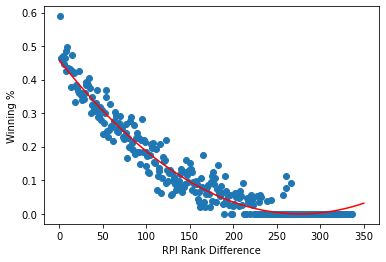

In [172]:
modelRpi = np.poly1d(np.polyfit(rpiSummed['rpiRank'], rpiSummed['favWinRpi'], 2))
line = np.linspace(0, 350, 100)
plt.plot(line, modelRpi(line), color='r')
plt.scatter(rpiSummed['rpiRank'], rpiSummed['favWinRpi'])
plt.xlabel('RPI Rank Difference')
plt.ylabel('Winning %')
plt.show()

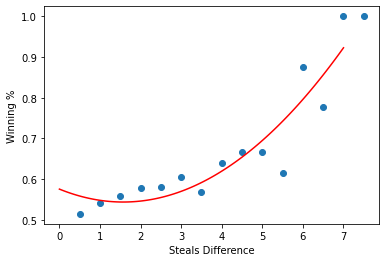

In [173]:
modelStl = np.poly1d(np.polyfit(stlSummed['stl'], stlSummed['favWinStl'], 2))
line = np.linspace(0, 7, 100)
plt.plot(line, modelStl(line), color='r')
plt.scatter(stlSummed['stl'], stlSummed['favWinStl'])
plt.xlabel('Steals Difference')
plt.ylabel('Winning %')
plt.show()

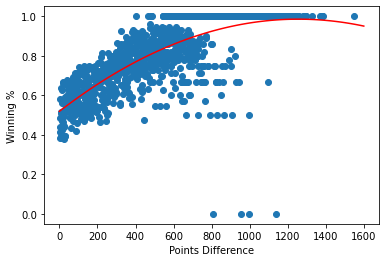

In [174]:
modelPts = np.poly1d(np.polyfit(ptsSummed['pts'], ptsSummed['favWinPts'], 2))
line = np.linspace(0, 1600, 100)
plt.plot(line, modelPts(line), color='r')
plt.scatter(ptsSummed['pts'], ptsSummed['favWinPts'])
plt.xlabel('Points Difference')
plt.ylabel('Winning %')
plt.show()

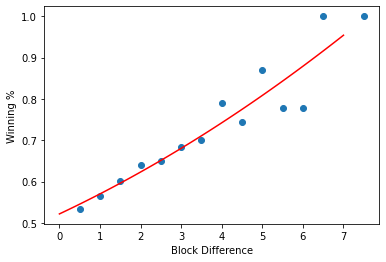

In [175]:
modelBlk = np.poly1d(np.polyfit(blkSummed['blk'], blkSummed['favWinBlk'], 2))
line = np.linspace(0, 7, 100)
plt.plot(line, modelBlk(line), color='r')
plt.scatter(blkSummed['blk'], blkSummed['favWinBlk'])
plt.xlabel('Block Difference')
plt.ylabel('Winning %')
plt.show()

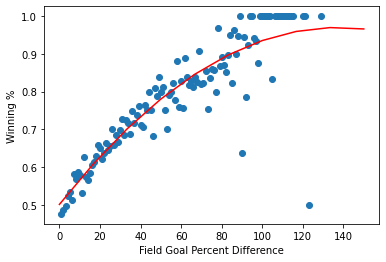

In [176]:
modelFgPcg = np.poly1d(np.polyfit(pcgSummed['fgPcg'], pcgSummed['favWinPcg'], 2))
line = np.linspace(0, 150, 10)
plt.plot(line, modelFgPcg(line), color='r')
plt.scatter(pcgSummed['fgPcg'], pcgSummed['favWinPcg'])
plt.xlabel('Field Goal Percent Difference')
plt.ylabel('Winning %')
plt.show()

Sada cemo ucitati podatke za utakmice turnira 2014 godine i svakoj utakmici pridruziti razliku vrijednosti novih statistika od oba tima.

In [177]:
teams = pd.read_csv("total2014.csv")
teams

,team_id,team_name,playedAgainst,owp,won,played,wp,fgm,fga,fgPcg,ptsTotal,stlTotal,blkTotal,oowp,rpi,rpiRank
0,1101,Abilene Chr,"[1182, 1382, 1268, 1234, 1395, 1462, 1406, 130...",0.460338,2,21,0.095238,427,1053,0.405508,1326,6.0,1.5,0.474180,0.372523,339.0
1,1102,Air Force,"[1119, 1440, 1238, 1115, 1350, 1160, 1377, 141...",0.492970,10,28,0.357143,618,1451,0.425913,1808,5.5,3.0,0.515688,0.464693,231.0
2,1103,Akron,"[1157, 1388, 1292, 1156, 1126, 1331, 1178, 133...",0.507936,21,33,0.636364,777,1799,0.431907,2241,6.5,4.0,0.513193,0.541357,98.0
3,1104,Alabama,"[1328, 1403, 1209, 1181, 1180, 1316, 1378, 114...",0.612793,12,31,0.387097,704,1606,0.438356,2068,6.5,4.0,0.544920,0.539401,100.0
4,1105,Alabama A&M,"[1307, 1444, 1184, 1240, 1398, 1325, 1283, 141...",0.418626,12,28,0.428571,603,1487,0.405514,1787,6.0,4.0,0.446720,0.428136,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1460,Wright St,"[1207, 1177, 1223, 1375, 1108, 1441, 1287, 129...",0.448458,18,32,0.562500,710,1580,0.449367,2127,6.5,3.0,0.493479,0.488224,181.0
347,1461,Wyoming,"[1404, 1160, 1117, 1238, 1377, 1326, 1286, 137...",0.511376,16,30,0.533333,654,1386,0.471861,1939,4.5,4.0,0.517649,0.518434,128.0
348,1462,Xavier,"[1205, 1397, 1287, 1275, 1101, 1234, 1397, 142...",0.564464,21,33,0.636364,846,1795,0.471309,2383,6.0,3.0,0.555836,0.580282,51.0
349,1463,Yale,"[1148, 1163, 1353, 1357, 1273, 1248, 1216, 113...",0.500480,14,27,0.518519,564,1372,0.411079,1777,6.0,4.5,0.479360,0.499710,164.0


In [178]:
tourney_results = pd.read_csv("tourney_compact_results.csv")
tourney_results = tourney_results[(tourney_results["season"] == 2014)]
tourney_results.drop(['season', 'daynum', 'wloc', 'numot'], axis=1, inplace=True)
tourney_results = tourney_results.tail(-4)
tourney_results1 = tourney_results
tourney_results1

,wteam,wscore,lteam,lscore
1853,1163,89,1386,81
1854,1173,60,1326,59
1855,1196,67,1107,55
1856,1217,61,1153,57
1857,1257,71,1264,64
...,...,...,...,...
1911,1163,60,1277,54
1912,1246,75,1276,72
1913,1163,63,1196,53
1914,1246,74,1458,73


In [179]:
rpiRankW = []
ptsW = []
fgPcgW = []
stlW = []
blkW = []
tourney_results.reset_index()

for i, row1 in tourney_results.iterrows():
    teamW = teams.loc[teams['team_id'] == row1.wteam]
    teamL = teams.loc[teams['team_id'] == row1.lteam]
    rpiRankW.append(teamW.iloc[0].rpiRank - teamL.iloc[0].rpiRank)
    ptsW.append(teamW.iloc[0].ptsTotal - teamL.iloc[0].ptsTotal)
    fgPcgW.append((teamW.iloc[0].fgPcg - teamL.iloc[0].fgPcg) * 1000)
    stlW.append(teamW.iloc[0].stlTotal - teamL.iloc[0].stlTotal)
    blkW.append(teamW.iloc[0].blkTotal - teamL.iloc[0].blkTotal)

tourney_results["rpiRank"] = rpiRankW
tourney_results["pts"] = ptsW
tourney_results["fgPcg"] = fgPcgW
tourney_results["stl"] = stlW
tourney_results["blk"] = blkW

tourney_results.to_csv("tourney2014.csv", index=False)

I na kraju racunamo ocekivani postotak pobjede za svaki tim na osnovu nasih statistika i srednju vrijednost postotaka.

In [180]:
rpiRankPre = []
ptsPre = []
fgPcgPre = []
stlPre = []
blkPre = []
tourney_results.reset_index()

for i, row1 in tourney_results.iterrows():
    if row1.rpiRank >= 0:
        rpiRankPre.append(modelRpi(row1.rpiRank))
    else:
        rpiRankPre.append(1 - modelRpi(row1.rpiRank.__abs__()))

    if row1.pts >= 0:
        ptsPre.append(modelPts(row1.pts))
    else:
        ptsPre.append(1 - modelPts(row1.pts.__abs__()))

    if row1.fgPcg >= 0:
        fgPcgPre.append(modelFgPcg(row1.fgPcg))
    else:
        fgPcgPre.append(1 - modelFgPcg(row1.fgPcg.__abs__()))

    if row1.stl >= 0:
        stlPre.append(modelStl(row1.stl))
    else:
        stlPre.append(1 - modelStl(row1.stl.__abs__()))

    if row1.blk >= 0:
        blkPre.append(modelBlk(row1.blk))
    else:
        blkPre.append(1 - modelBlk(row1.blk.__abs__()))

tourney_results["rpiRankPre"] = rpiRankPre
tourney_results["ptsPre"] = ptsPre
tourney_results["fgPcgPre"] = fgPcgPre
tourney_results["stlPre"] = stlPre
tourney_results["blkPre"] = blkPre

tourney_results["prediction"] = tourney_results[['rpiRankPre', 'ptsPre', 'fgPcgPre', 'stlPre', 'blkPre']].mean(axis=1)

tourney_results.to_csv("tourney2014.csv", index=False)
tourney_results

,wteam,wscore,lteam,lscore,rpiRank,pts,fgPcg,stl,blk,rpiRankPre,ptsPre,fgPcgPre,stlPre,blkPre,prediction
1853,1163,89,1386,81,-9.0,91,-20.237437,2.5,1.5,0.572092,0.584265,0.370996,0.554885,0.596134,0.535674
1854,1173,60,1326,59,16.0,49,17.385876,-1.5,-2.0,0.405798,0.554824,0.612178,0.456143,0.376859,0.481160
1855,1196,67,1107,55,-207.0,292,22.952144,1.5,0.0,0.971585,0.710724,0.644646,0.543857,0.521756,0.678513
1856,1217,61,1153,57,33.0,-138,40.958606,-0.5,-0.5,0.354539,0.384026,0.739110,0.441472,0.454558,0.474741
1857,1257,71,1264,64,-47.0,316,23.007056,1.5,-1.5,0.685082,0.724227,0.644958,0.543857,0.403866,0.600398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,1163,60,1277,54,8.0,-139,-26.303918,0.0,1.0,0.431115,0.383365,0.336548,0.575501,0.570235,0.459353
1912,1246,75,1276,72,6.0,126,-24.549490,0.0,3.5,0.437563,0.608003,0.346322,0.575501,0.710803,0.535638
1913,1163,63,1196,53,20.0,38,-13.745415,0.0,3.0,0.393426,0.546941,0.409891,0.575501,0.680475,0.521247
1914,1246,74,1458,73,11.0,154,-6.640858,0.0,2.5,0.421531,0.626471,0.454860,0.575501,0.651255,0.545924


In [181]:
teams = pd.read_csv('teams.csv')
tourney_results = pd.read_csv('tourney2014.csv')
wName = []
lName = []
for i, row1 in tourney_results.iterrows():
    teamW = teams.loc[teams['team_id'] == row1.wteam]
    teamL = teams.loc[teams['team_id'] == row1.lteam]
    wName.append(teamW.iloc[0].team_name)
    lName.append(teamL.iloc[0].team_name)
tourney_results["wName"] = wName
tourney_results["lName"] = lName
tourney_results.to_csv("tourney2014.csv", index=False)
tourney_results

,wteam,wscore,lteam,lscore,rpiRank,pts,fgPcg,stl,blk,rpiRankPre,ptsPre,fgPcgPre,stlPre,blkPre,prediction,wName,lName
0,1163,89,1386,81,-9.0,91,-20.237437,2.5,1.5,0.572092,0.584265,0.370996,0.554885,0.596134,0.535674,Connecticut,St Joseph's PA
1,1173,60,1326,59,16.0,49,17.385876,-1.5,-2.0,0.405798,0.554824,0.612178,0.456143,0.376859,0.481160,Dayton,Ohio St
2,1196,67,1107,55,-207.0,292,22.952144,1.5,0.0,0.971585,0.710724,0.644646,0.543857,0.521756,0.678513,Florida,Albany NY
3,1217,61,1153,57,33.0,-138,40.958606,-0.5,-0.5,0.354539,0.384026,0.739110,0.441472,0.454558,0.474741,Harvard,Cincinnati
4,1257,71,1264,64,-47.0,316,23.007056,1.5,-1.5,0.685082,0.724227,0.644958,0.543857,0.403866,0.600398,Louisville,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1163,60,1277,54,8.0,-139,-26.303918,0.0,1.0,0.431115,0.383365,0.336548,0.575501,0.570235,0.459353,Connecticut,Michigan St
59,1246,75,1276,72,6.0,126,-24.549490,0.0,3.5,0.437563,0.608003,0.346322,0.575501,0.710803,0.535638,Kentucky,Michigan
60,1163,63,1196,53,20.0,38,-13.745415,0.0,3.0,0.393426,0.546941,0.409891,0.575501,0.680475,0.521247,Connecticut,Florida
61,1246,74,1458,73,11.0,154,-6.640858,0.0,2.5,0.421531,0.626471,0.454860,0.575501,0.651255,0.545924,Kentucky,Wisconsin


In [182]:
print("Predicted correct result for: " + str(
    len(tourney_results[tourney_results["prediction"] >= 0.5])) + " out of: " + str(len(tourney_results)) + " games")
print("Percentage of correct predictions: " + str(
    len(tourney_results[tourney_results["prediction"] >= 0.5]) / len(tourney_results)) + " %")

Predicted correct result for: 38 out of: 63 games
Percentage of correct predictions: 0.6031746031746031 %
